In [ ]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import optimizers
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np

Loading and visulaizing the MNIST Dataset

11501568/11490434 [==============================] - 0s 0us/step


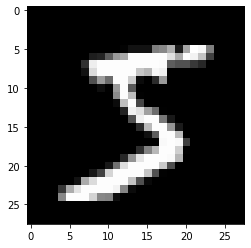

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()

Defining the network architechure for Encoder

In [ ]:
LATENT_SIZE = 64
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    Activation("relu"),
    Dropout(0.5),
    Dense(128),
    Activation("relu"),
    Dropout(0.5),
    Dense(LATENT_SIZE, activation="relu"),
])

Defining the network architechure for Decoder

In [ ]:
decoder = Sequential([
    Dense(128, input_shape = (LATENT_SIZE,)),
    Activation("relu"),
    Dropout(0.5),
    Dense(512),
    Activation("relu"),
    Dropout(0.5),
    Dense(784),
    Activation("relu"),
    Reshape((28, 28))
])

In [ ]:
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(adam, loss = "mse",metrics=['accuracy'])

Training the Model

In [ ]:
# mc2 = ModelCheckpoint('best_model2.h5', monitor='val_accuracy', mode='max', 
#                      verbose=1, save_best_only=True)

# Train the model.
history=model.fit(
  x_train, 
  x_train, 
  batch_size = 64,
  epochs=30, 
  validation_split=0.10
  # callbacks=[mc2]
)

Epoch 1/30
844/844 [==============================] - 7s 4ms/step - loss: 0.0536 - accuracy: 0.3212 - val_loss: 0.0399 - val_accuracy: 0.4114
Epoch 2/30
844/844 [==============================] - 3s 4ms/step - loss: 0.0430 - accuracy: 0.3816 - val_loss: 0.0356 - val_accuracy: 0.4357
Epoch 3/30
844/844 [==============================] - 3s 4ms/step - loss: 0.0407 - accuracy: 0.3960 - val_loss: 0.0339 - val_accuracy: 0.4437
Epoch 4/30
844/844 [==============================] - 3s 4ms/step - loss: 0.0395 - accuracy: 0.4025 - val_loss: 0.0327 - val_accuracy: 0.4487
Epoch 5/30
844/844 [==============================] - 3s 4ms/step - loss: 0.0388 - accuracy: 0.4074 - val_loss: 0.0320 - val_accuracy: 0.4546
Epoch 6/30
844/844 [==============================] - 4s 4ms/step - loss: 0.0383 - accuracy: 0.4111 - val_loss: 0.0311 - val_accuracy: 0.4576
Epoch 7/30
844/844 [==============================] - 3s 4ms/step - loss: 0.0378 - accuracy: 0.4139 - val_loss: 0.0310 - val_accuracy: 0.4570
Epoch 

Plotting epoch-wise Training and Validation Loss

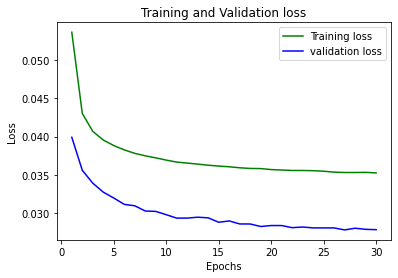

In [ ]:
loss_train = history.history["loss"]
loss_val = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test,x_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0280 - accuracy: 0.4672


[0.028027761727571487, 0.46721428632736206]

In [ ]:
# EPOCHS = 1000
# #Only do plotting if you have IPython, Jupyter, or using Colab
# for epoch in range(EPOCHS):
#     fig, axs = plt.subplots(4, 4, figsize=(4,4))
#     rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
#     display.clear_output() # If you imported display from IPython
    
#     for i in range(4):
#         for j in range(4):
#             axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
#             axs[i, j].axis("off")
    
#     plt.subplots_adjust(wspace = 0, hspace = 0)
#     plt.show()
#     print("-----------", "EPOCH", epoch, "-----------")
#     model.fit(x_train, x_train, batch_size = 64)

In [ ]:
augmented = Sequential([
    Dense(32, input_shape = (64,)),
    Activation("relu"),
    Dropout(0.5),
    Dense(10),
    Activation("softmax")
])

In [ ]:
output = augmented(latent_vector)
model = Model(inputs = img, outputs = output)
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(adam, loss = "categorical_crossentropy",metrics=['accuracy'])

In [ ]:
# x_train = x_train.reshape((-1, 784))
# x_test = x_test.reshape((-1, 784))

In [ ]:
history=model.fit(
  x_train,
  to_categorical(y_train), 
  batch_size = 64,
  epochs=30, 
  validation_split=0.10
  # callbacks=[mc2]
)

Epoch 1/30
844/844 [==============================] - 4s 4ms/step - loss: 0.6276 - accuracy: 0.8227 - val_loss: 0.1477 - val_accuracy: 0.9592
Epoch 2/30
844/844 [==============================] - 5s 5ms/step - loss: 0.3826 - accuracy: 0.9029 - val_loss: 0.1171 - val_accuracy: 0.9658
Epoch 3/30
844/844 [==============================] - 3s 4ms/step - loss: 0.3189 - accuracy: 0.9207 - val_loss: 0.1024 - val_accuracy: 0.9703
Epoch 4/30
844/844 [==============================] - 3s 3ms/step - loss: 0.2799 - accuracy: 0.9304 - val_loss: 0.0875 - val_accuracy: 0.9733
Epoch 5/30
844/844 [==============================] - 3s 3ms/step - loss: 0.2557 - accuracy: 0.9371 - val_loss: 0.0889 - val_accuracy: 0.9752
Epoch 6/30
844/844 [==============================] - 3s 3ms/step - loss: 0.2382 - accuracy: 0.9401 - val_loss: 0.0879 - val_accuracy: 0.9743
Epoch 7/30
844/844 [==============================] - 3s 3ms/step - loss: 0.2227 - accuracy: 0.9443 - val_loss: 0.0850 - val_accuracy: 0.9752
Epoch 

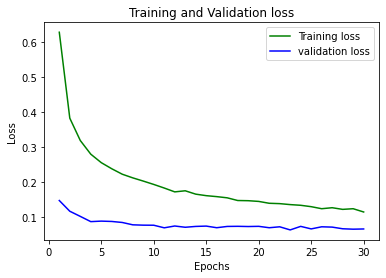

In [ ]:
loss_train = history.history["loss"]
loss_val = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
model.evaluate(x_test,to_categorical(y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.1063 - accuracy: 0.9795


[0.1063440814614296, 0.9794999957084656]